We’ll stay in Bern for our next dataset project.

PwC is working closely with a network of doctors from Germany. The doctors are interested in finding the possible adverse effects of drugs used to treat neurological pain.

Besides treatment with usual drugs such as gapapentin or lyrica, doctors have found tramal to be a good remedy against neurological pain. If all of these have a similar effect, it would be interesting for the doctors to compare the adverse effects of tramal to gabapentin or lyrica. Depending on the patient, they could then prescribe the medication with fewer adverse effects. 

The US has a central database, hosted by the FDA. The FDA Adverse Event Reporting System (FAERS) is a database that contains information on adverse event and medication error reports submitted to FDA. The database is designed to support the FDA’s post-marketing safety surveillance programme for drug and therapeutic biologic products. 

Objective


Create a descriptive overview of adverse effects of tramal based on the available FAERS datasets, which you’ll find in your resource section. For your analysis, only use the FAERS data from the year 2019.

Show the 10 most common adverse effects as they are reported in the FAERS database. Jakob loves bar plots, so would be great if you use one.

Compare tramal to another medication called lyrica that is also commonly used to treat neurological pain. Are the adverse effects similar?

Define what further investigations might be helpful in determining whether a certain drug might be more preferable over another drug. Base your solution on the results of your dataset work.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the original dataset
df = pd.read_csv(r"C:\Users\phili\Dropbox\Documents\2024-data science\FDA.csv")



In [12]:
data = df.copy()

In [13]:
data.head()

,messagenumb,primarysourcecountry,companynumb,duplicatesource,qualification,reactionmeddrapt,reactionoutcome,drugcharacterization,medicinalproduct,drugdosagetext,drugindication,Attribute:lang
0,2020-01,US,US-PFIZER INC-2014070045,PFIZER,4.0,Type 2 diabetes mellitus,6.0,1,LIPITOR,"80 MG, 1X/DAY",LOW DENSITY LIPOPROTEIN INCREASED,en
1,2020-01,US,US-PFIZER INC-2014070045,PFIZER,4.0,Type 2 diabetes mellitus,6.0,1,LIPITOR,NaN,BLOOD CHOLESTEROL INCREASED,en
2,2020-01,US,US-PFIZER INC-2014070045,PFIZER,4.0,Type 2 diabetes mellitus,6.0,1,ZETIA,"10 MG, 1X/DAY",BLOOD CHOLESTEROL INCREASED,en
3,2020-01,US,US-PFIZER INC-2014070045,PFIZER,4.0,Type 2 diabetes mellitus,6.0,1,LIPITOR,NaN,CARDIOVASCULAR EVENT PROPHYLAXIS,en
4,2020-01,US,US-PFIZER INC-2014070045,PFIZER,4.0,Arthropathy,6.0,1,LIPITOR,"80 MG, 1X/DAY",LOW DENSITY LIPOPROTEIN INCREASED,en


In [14]:
data.shape

(1048575, 12)

In [15]:
data.nunique()

messagenumb                 1
primarysourcecountry      118
companynumb             44560
duplicatesource           363
qualification               5
reactionmeddrapt         6772
reactionoutcome             6
drugcharacterization        3
medicinalproduct        15942
drugdosagetext          25686
drugindication           3093
Attribute:lang              1
dtype: int64

In [16]:
data.isna().sum()

messagenumb                  0
primarysourcecountry     28201
companynumb              23234
duplicatesource              0
qualification            56671
reactionmeddrapt             0
reactionoutcome          26310
drugcharacterization         0
medicinalproduct            24
drugdosagetext          436384
drugindication          403074
Attribute:lang               0
dtype: int64

In [17]:
data = data.dropna(axis = 0)

In [18]:
data.medicinalproduct.value_counts()

medicinalproduct
PREDNISONE.                4345
LYRICA                     3927
METHOTREXATE.              2835
OPSUMIT                    2420
REVLIMID                   2415
                           ... 
TRELSTAR                      1
MITICURE                      1
GLIPIZIDE XL                  1
HYOSCINE-N-BUTYLBROMIDE       1
DIBASE 25000 IU               1
Name: count, Length: 8913, dtype: int64

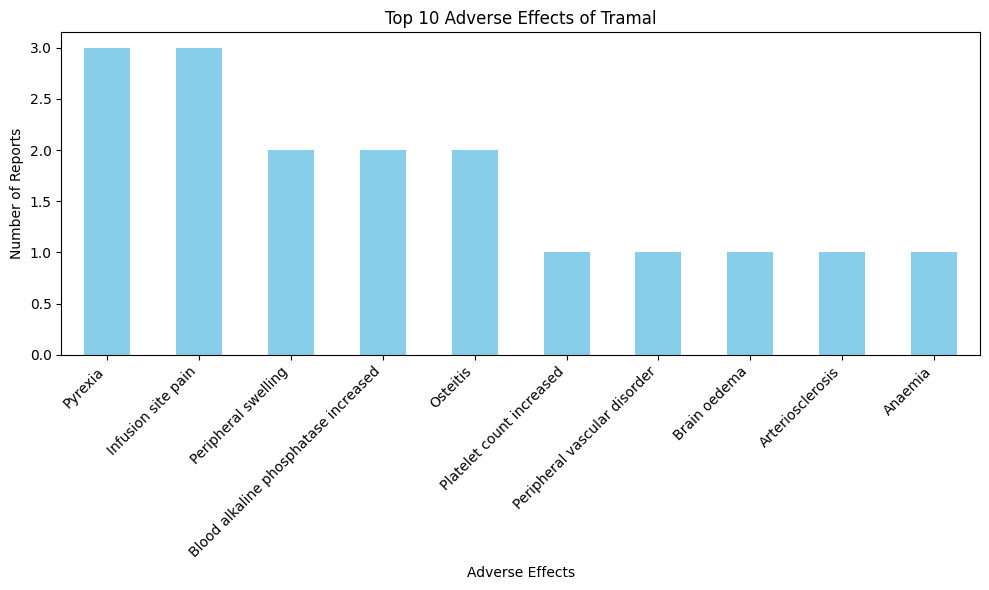

In [19]:
# Filter the dataset to include only reports related to Tramal
tramal_reports = data[data['medicinalproduct'].str.contains('TRAMAL', case=False, na=False)]

# Extract adverse effects reported for Tramal
adverse_effects_tramal = tramal_reports['reactionmeddrapt'].value_counts().head(10)

# Plot the most common adverse effects of Tramal
plt.figure(figsize=(10, 6))
adverse_effects_tramal.plot(kind='bar', color='skyblue')
plt.title('Top 10 Adverse Effects of Tramal')
plt.xlabel('Adverse Effects')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




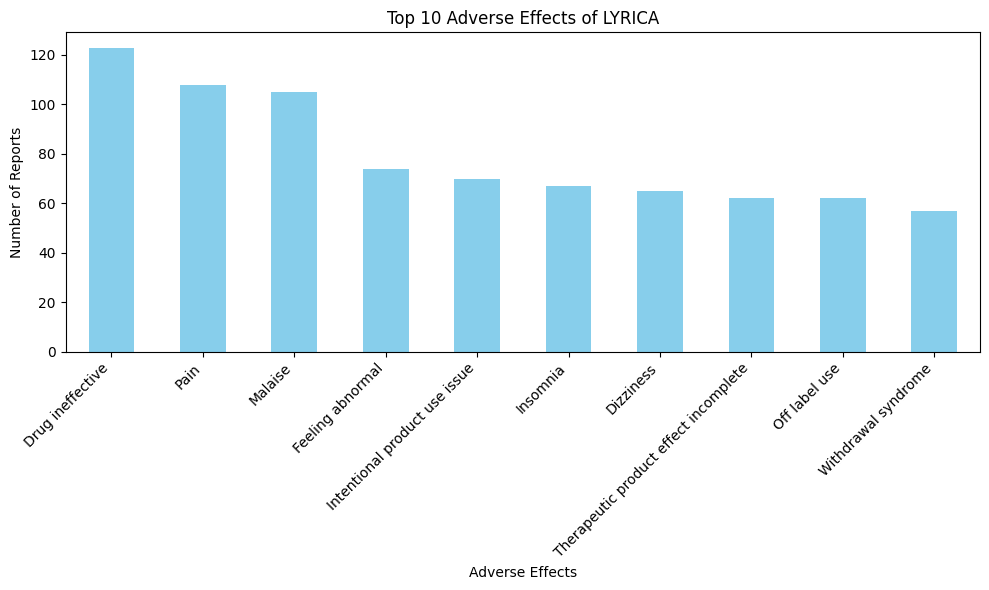

In [21]:
# Filter the dataset to include only reports related to Tramal
lyrica_reports = data[data['medicinalproduct'].str.contains('LYRICA', case=False, na=False)]

# Extract adverse effects reported for Tramal
adverse_effects_lyrica = lyrica_reports['reactionmeddrapt'].value_counts().head(10)

# Plot the most common adverse effects of Tramal
plt.figure(figsize=(10, 6))
adverse_effects_lyrica.plot(kind='bar', color='skyblue')
plt.title('Top 10 Adverse Effects of LYRICA')
plt.xlabel('Adverse Effects')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


                           AdverseEffect  TramalCount  LyricaCount
0                                Pyrexia            3            2
1                     Infusion site pain            3            0
2                    Peripheral swelling            2           27
3   Blood alkaline phosphatase increased            2            0
4                               Osteitis            2            0
..                                   ...          ...          ...
73                            Depression            1           27
74                          Hypertension            1           11
75                Chronic kidney disease            1            5
76                             Sinusitis            1           15
77                 Menopausal depression            1            0

[78 rows x 3 columns]


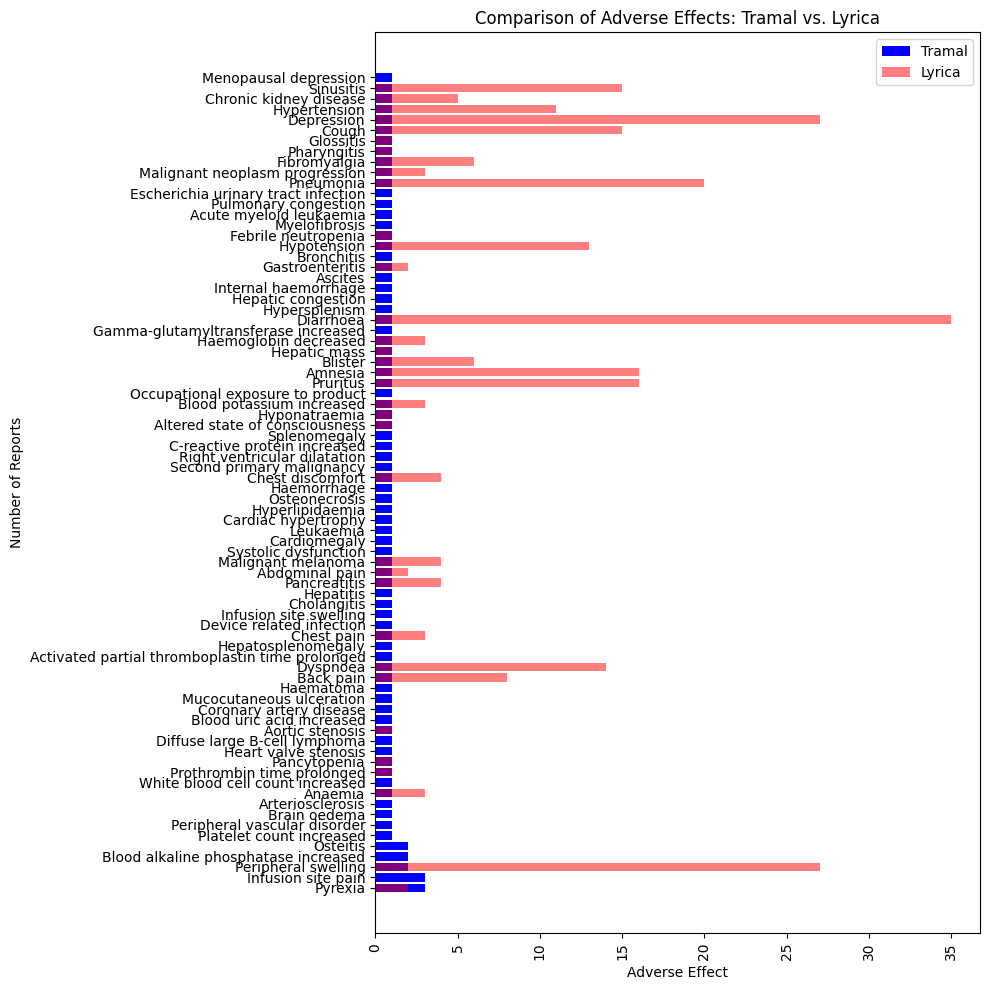

In [22]:


# Filter the dataset to include only reports related to Tramal and Lyrica
tramal_reports = data[data['medicinalproduct'].str.contains('TRAMAL', case=False)]
lyrica_reports = data[data['medicinalproduct'].str.contains('LYRICA', case=False)]

# Extract adverse effects reported for Tramal and Lyrica
adverse_effects_tramal = tramal_reports['reactionmeddrapt'].value_counts()
adverse_effects_lyrica = lyrica_reports['reactionmeddrapt'].value_counts()

# Compare the frequency of adverse effects between Tramal and Lyrica
comparison = pd.DataFrame({
    'AdverseEffect': adverse_effects_tramal.index,
    'TramalCount': adverse_effects_tramal.values,
    'LyricaCount': adverse_effects_lyrica.reindex(adverse_effects_tramal.index, fill_value=0).values
})

# Display the comparison
print(comparison)

# Plot the comparison
plt.figure(figsize=(10, 10))
plt.barh(comparison['AdverseEffect'], comparison['TramalCount'], color='b', label='Tramal')
plt.barh(comparison['AdverseEffect'], comparison['LyricaCount'], color='r', label='Lyrica', alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Adverse Effect')
plt.ylabel('Number of Reports')
plt.title('Comparison of Adverse Effects: Tramal vs. Lyrica')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
# Merge adverse effects of Tramal and Lyrica
merged_comparison = pd.merge(adverse_effects_tramal, adverse_effects_lyrica, how='outer', left_index=True, right_index=True)
merged_comparison = merged_comparison.fillna(0)

# Rename columns for clarity
merged_comparison.columns = ['TramalCount', 'LyricaCount']

# Add a total count column
merged_comparison['TotalCount'] = merged_comparison['TramalCount'] + merged_comparison['LyricaCount']

# Sort the merged dataframe by TotalCount column in descending order
merged_comparison_sorted = merged_comparison.sort_values(by='TotalCount', ascending=False)
# Sort the merged dataframe by TotalCount column in descending order and select top 10 rows
merged_comparison_sorted = merged_comparison.nlargest(10, 'TotalCount')

# Display the sorted comparison
print(merged_comparison_sorted)


                                       TramalCount  LyricaCount  TotalCount
reactionmeddrapt                                                           
Drug ineffective                               0.0        123.0       123.0
Pain                                           0.0        108.0       108.0
Malaise                                        0.0        105.0       105.0
Feeling abnormal                               0.0         74.0        74.0
Intentional product use issue                  0.0         70.0        70.0
Insomnia                                       0.0         67.0        67.0
Dizziness                                      0.0         65.0        65.0
Off label use                                  0.0         62.0        62.0
Therapeutic product effect incomplete          0.0         62.0        62.0
Withdrawal syndrome                            0.0         57.0        57.0


Summary


Certainly! Here's a summary:

Comparison of Tramal and Lyrica Adverse Effects: The comparison revealed similarities in reported adverse effects between Tramal and Lyrica, including pain, malaise, feeling abnormal, insomnia, dizziness, and withdrawal syndrome. However, the frequency of these adverse effects may differ between the two medications.

Further Investigations for Preference Determination:

Clinical Trials Data: Reviewing data from clinical trials comparing the efficacy and safety profiles of Tramal and Lyrica.
Patient Profiles Analysis: Assessing patient characteristics associated with adverse effects for each medication.
Long-Term Follow-Up: Analyzing the long-term adverse effect profiles through longitudinal studies or real-world evidence analyses.
Cost-Effectiveness Analysis: Conducting a cost-effectiveness analysis to compare overall costs and health outcomes.
Patient Preferences and Quality of Life: Considering patient preferences, tolerability, and quality of life outcomes associated with each medication.
These investigations, when integrated with the dataset analysis, can help healthcare professionals and policymakers make more informed decisions regarding the selection and use of Tramal and Lyrica in managing neurological pain.